# MPHY0041 Coursework   20091404

## Question 1

In [1]:
#import relevant python packages
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

First let's see what is the data looks like

In [2]:
#load the training and test data (assuming it is in the same folder)
training_data = pd.read_csv("ADNI_CSF.csv")

In [3]:
#let's have a look at the first few rows
training_data.head()

,Unnamed: 0,DX,ABETA,TAU
0,17,Dementia,3.838482,1.240842
1,22,MCI,7.770145,0.792544
2,28,CN,2.833178,1.744529
3,61,Dementia,1.850133,1.707775
4,66,CN,8.189453,1.053965


In [4]:
#we need a color vector to highlight the different classes
col_vec = pd.Series(['blue'] * training_data.shape[0])

In [7]:
#set the color to 'orange' where DX is equal to MCI, set the color to 'black' where DX is equal to CN
col_vec[training_data.DX=='MCI'] = 'orange'
col_vec[training_data.DX=='CN'] = 'black'

Let's have a look at the data using a scatter plot.

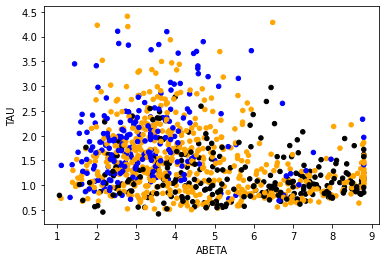

In [8]:
training_data.plot.scatter(x='ABETA', y='TAU',c=col_vec)

### 1 a)

Now let's compute the means for ABETA for the ‘CN’ (𝜇$_{CN}$) and the ‘Dementia’ (𝜇$_{Dementia}$) groups.

In [13]:
g = training_data['ABETA'].groupby(training_data['DX']).mean()
print(g)

DX
CN          5.492503
Dementia    3.318838
MCI         4.510940
Name: ABETA, dtype: float64


So 𝜇$_{CN}$ = 5.492503, 𝜇$_{Dementia}$ = 3.318838.

Then compute the standard deviation (𝜎) for ABETA:

In [14]:
h = training_data['ABETA'].std()
print(h)

2.0000002422611223


So 𝜎 = 2.

To compute the decision boundary between the two disease group, we will use the Linear Discriminant Analysis(LDA) method.

In [69]:
# first is to calculate beta0 and beta1
pi_Dementia = 0.5
pi_CN = 0.5
miu_CN = 5.492503
miu_Dementia = 3.318838
sigma = h
beta0 = math.log(pi_CN / pi_Dementia) - (miu_CN - miu_Dementia) * (miu_CN + miu_Dementia) / (2 * sigma)
beta1 = (miu_CN - miu_Dementia) / sigma

In [70]:
beta0, beta1

(-4.788225303690833, 1.0868323683513854)

In [71]:
# then calculate the decision boundary which is the solution of 0 = beta0 + x * beta1
x = - beta0 / beta1
x

4.4056705

That means the decision boundary is ABETA = 4.4056705

### 2 b)

First let's make a split of training data in three group of DX

In [15]:
classinformation = training_data['DX'].unique() # get the group titles of DX
print(classinformation)

['Dementia' 'MCI' 'CN']


In [19]:
# make a split of training data with different DX
for temp_classinformation in classinformation:
    temp_data = training_data[training_data['DX'].isin([temp_classinformation])]
    exec("training_data_%s = temp_data"%temp_classinformation)

In [21]:
print("training_data_Dementia:")
print(training_data_Dementia)
print("training_data_CN:")
print(training_data_CN)

training_data_Dementia:
      Unnamed: 0        DX     ABETA       TAU
0             17  Dementia  3.838482  1.240842
3             61  Dementia  1.850133  1.707775
7            132  Dementia  2.292736  1.372846
24           472  Dementia  2.606441  2.267888
26           506  Dementia  1.629090  2.430953
...          ...       ...       ...       ...
995        13398  Dementia  4.074537  3.665065
996        13400  Dementia  2.458389  1.232042
1005       13460  Dementia  4.310593  2.538627
1033        2924  Dementia  8.800297  1.966608
1040       11896  Dementia  8.800297  1.414259

[222 rows x 4 columns]
training_data_CN:
      Unnamed: 0  DX     ABETA       TAU
2             28  CN  2.833178  1.744529
4             66  CN  8.189453  1.053965
5             81  CN  2.850261  0.882618
6            116  CN  8.525935  0.937490
10           193  CN  7.899561  0.765108
...          ...  ..       ...       ...
1030          88  CN  8.800297  1.106249
1031       10820  CN  8.800297  1.618737
1

In [23]:
# merge the training data with DX is Dementia and CN
training_data_noMCI = pd.merge(training_data_Dementia, training_data_CN, how = 'outer')
print(training_data_noMCI)

     Unnamed: 0        DX     ABETA       TAU
0            17  Dementia  3.838482  1.240842
1            61  Dementia  1.850133  1.707775
2           132  Dementia  2.292736  1.372846
3           472  Dementia  2.606441  2.267888
4           506  Dementia  1.629090  2.430953
..          ...       ...       ...       ...
493          88        CN  8.800297  1.106249
494       10820        CN  8.800297  1.618737
495       13448        CN  8.800297  1.578877
496       11522        CN  8.800297  0.957679
497        2516        CN  8.800297  1.721752

[498 rows x 4 columns]


In [26]:
# what we need is to make our class be 0 and 1
group = pd.Series([1] * training_data_noMCI.shape[0])
group[training_data_noMCI.DX=='Dementia'] = 0
print(group)

0      0
1      0
2      0
3      0
4      0
      ..
493    1
494    1
495    1
496    1
497    1
Length: 498, dtype: int64


In [28]:
training_data_noMCI['group'] = group  # add a new column as group

In [29]:
print(training_data_noMCI)

     Unnamed: 0        DX     ABETA       TAU  group
0            17  Dementia  3.838482  1.240842      0
1            61  Dementia  1.850133  1.707775      0
2           132  Dementia  2.292736  1.372846      0
3           472  Dementia  2.606441  2.267888      0
4           506  Dementia  1.629090  2.430953      0
..          ...       ...       ...       ...    ...
493          88        CN  8.800297  1.106249      1
494       10820        CN  8.800297  1.618737      1
495       13448        CN  8.800297  1.578877      1
496       11522        CN  8.800297  0.957679      1
497        2516        CN  8.800297  1.721752      1

[498 rows x 5 columns]


In [31]:
#train linear regression model
from sklearn.linear_model import LinearRegression 

my_linear = LinearRegression()
my_linear.fit(training_data_noMCI.loc[:,"ABETA":"TAU"], training_data_noMCI.group)

LinearRegression()

In [32]:
#we need a color vector to highlight the different classes
col_vec = pd.Series(['blue'] * training_data_noMCI.shape[0])
col_vec[training_data_noMCI.DX=='CN'] = 'orange'

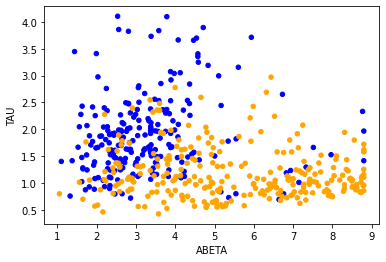

In [34]:
training_data_noMCI.plot.scatter(x='ABETA', y='TAU',c=col_vec)

In [35]:
my_linear.coef_

array([ 0.09940085, -0.28239361])

In the array above, the entries are $\beta_1$ and $\beta_2$. For the intecept ($\beta_0$) we need to use this variable:

In [36]:
my_linear.intercept_

0.5273503197444775

And this is $\beta_0$. To find the decision boundary we need to solve:\
\
$ 0.5 = \beta_0 + \beta_1 * x_1 + \beta_2 * x_2 $ (since 0.5 is where we change our decision from 0 to 1).\
\
If we solve this for $x_2$, then:\
\
$ x_2 = \frac{0.5 - \beta_0 - \beta_1 * x_1}{\beta_2} $\
\
Using the values for the $\beta$ from the LinearRegression above, we get:\
\
$ x_2 = 0.097 + 0.352 * x_1 $

In [43]:
x1_seq = np.arange(1,9,0.5)
x2_seq = 0.097 + 0.352 * x1_seq

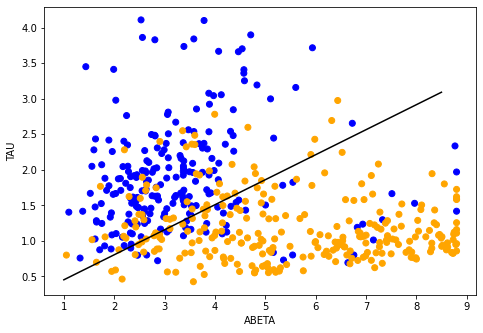

In [46]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=training_data_noMCI.ABETA, y=training_data_noMCI.TAU, c=col_vec)
ax.plot(x1_seq, x2_seq,c='black')
ax.set_xlabel("ABETA")
ax.set_ylabel("TAU")
plt.show()

### 1 c)

Use the same method as in part a, which will output the mean of ABETA and TAU of three groups:

In [64]:
del training_data['Unnamed: 0']

In [65]:
g = training_data.groupby(training_data['DX']).mean()
print(g)

             ABETA       TAU
DX                          
CN        5.492503  1.177854
Dementia  3.318838  1.894030
MCI       4.510940  1.492765


In [67]:
cov_sigma = training_data.cov()
print(cov_sigma)

          ABETA       TAU
ABETA  4.000001 -0.368581
TAU   -0.368581  0.484542


Now let's compute the betas between any two groups, first is input the basic parameters of LDA

In [80]:
pi_CN = 0.33
pi_Dementia = 0.33
pi_MCI = 0.33

In [82]:
miu_CN = np.array(g.loc['CN']).reshape(-1, 1)
miu_Dementia = np.array(g.loc['Dementia']).reshape(-1, 1)
miu_MCI = np.array(g.loc['MCI']).reshape(-1, 1)

In [85]:
sigma = np.array(cov_sigma)

array([[ 4.00000097, -0.36858067],
       [-0.36858067,  0.48454188]])

Then let's compute the decision boundary between CN and Dementia

In [86]:
beta00 = math.log(pi_CN / pi_Dementia) - (miu_CN - miu_Dementia).T @ np.linalg.inv(sigma) @ (miu_CN + miu_Dementia) / 2
beta10 = np.linalg.inv(sigma) @ (miu_CN - miu_Dementia) 

In [89]:
beta00, beta10

(array([[-0.17076391]]),
 array([[ 0.4379161 ],
        [-1.14493276]]))

So for CN and Dementia, the $ \beta_0 = -0.17076391,  \beta_1 = 0.4379161,  \beta_2 = -1.14493276$.\
\
To find the decision boundary we need to solve:\
\
$ 0 = \beta_0 + \beta_1 * x_1 + \beta_2 * x_2 $ .\
\
If we solve this for $x_2$, then:\
\
$ x_2 = \frac{- \beta_0 - \beta_1 * x_1}{\beta_2} $\
\
Using the values for the $\beta$ above, we get:\
\
$ x_2 = -0.149 + 0.382 * x_1 $

The same thing can be done between CN and MCI.

In [94]:
beta01 = math.log(pi_CN / pi_MCI) - (miu_CN - miu_MCI).T @ np.linalg.inv(sigma) @ (miu_CN + miu_MCI) / 2
beta11 = np.linalg.inv(sigma) @ (miu_CN - miu_MCI) 
beta01, beta11

(array([[-0.33256609]]),
 array([[ 0.19948679],
        [-0.49816997]]))

So for CN and MCI, the $ \beta_0 = -0.33256609,  \beta_1 = 0.19948679,  \beta_2 = 0.49816997$.\
\
To find the decision boundary we need to solve:\
\
$ 0 = \beta_0 + \beta_1 * x_1 + \beta_2 * x_2 $ .\
\
If we solve this for $x_2$, then:\
\
$ x_2 = \frac{- \beta_0 - \beta_1 * x_1}{\beta_2} $\
\
Using the values for the $\beta$ above, we get:\
\
$ x_2 = -0.668 + 0.400 * x_1 $

The last is between Dementia and MCI

In [97]:
beta02 = math.log(pi_Dementia / pi_MCI) - (miu_Dementia - miu_MCI).T @ np.linalg.inv(sigma) @ (miu_Dementia + miu_MCI) / 2
beta12 = np.linalg.inv(sigma) @ (miu_Dementia - miu_MCI) 
beta02, beta12

(array([[-0.16180218]]),
 array([[-0.23842932],
        [ 0.64676279]]))

So for Dementia and MCI, the $ \beta_0 = -0.16180218,  \beta_1 = -0.23842932,  \beta_2 = 0.64676279$.\
\
To find the decision boundary we need to solve:\
\
$ 0 = \beta_0 + \beta_1 * x_1 + \beta_2 * x_2 $ .\
\
If we solve this for $x_2$, then:\
\
$ x_2 = \frac{- \beta_0 - \beta_1 * x_1}{\beta_2} $\
\
Using the values for the $\beta$ above, we get:\
\
$ x_2 = 0.514 + 0.369 * x_1 $

In [107]:
#we need a color vector to highlight the different classes
col_vec = pd.Series(['blue'] * training_data.shape[0])
#set the color to 'orange' where DX is equal to MCI, set the color to 'black' where DX is equal to CN
col_vec[training_data.DX=='MCI'] = 'orange'
col_vec[training_data.DX=='CN'] = 'black'

In [101]:
x1_seq = np.arange(1,9,0.5)
x2_seq1 = -0.149 + 0.382 * x1_seq
x2_seq2 = -0.668 + 0.400 * x1_seq
x2_seq3 = 0.514 + 0.369 * x1_seq

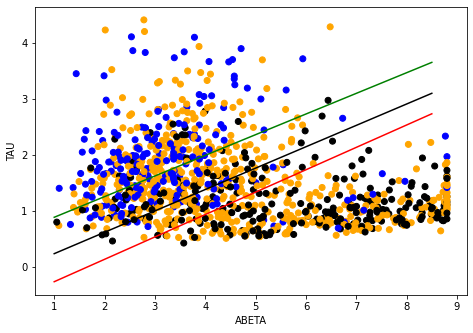

In [108]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=training_data.ABETA, y=training_data.TAU, c=col_vec)
ax.plot(x1_seq, x2_seq1,c='black') # between Demansia and CN, blue points and black points
ax.plot(x1_seq, x2_seq2,c='red')   # between CN and MCI, black points and orange points
ax.plot(x1_seq, x2_seq3,c='green') # between Demansia and MCI, blue points and orange points
ax.set_xlabel("ABETA")
ax.set_ylabel("TAU")
plt.show()

### 1 d)

We will first add a new column of ABETA * TAU to the dataframe

In [109]:
training_data['AxT'] = training_data.ABETA * training_data.TAU

In [111]:
training_data.head()

,DX,ABETA,TAU,AxT
0,Dementia,3.838482,1.240842,4.762950
1,MCI,7.770145,0.792544,6.158184
2,CN,2.833178,1.744529,4.942562
3,Dementia,1.850133,1.707775,3.159611
4,CN,8.189453,1.053965,8.631396


Then let's repeat what we have done in part c

In [112]:
m = training_data.groupby(training_data['DX']).mean()
print(m)

             ABETA       TAU       AxT
DX                                    
CN        5.492503  1.177854  6.380413
Dementia  3.318838  1.894030  6.389258
MCI       4.510940  1.492765  6.383300


In [113]:
cov_sigma = training_data.cov()
print(cov_sigma)

          ABETA       TAU        AxT
ABETA  4.000001 -0.368581   3.654501
TAU   -0.368581  0.484542   1.496275
AxT    3.654501  1.496275  11.833322


In [116]:
miu_CN = np.array(m.loc['CN']).reshape(-1, 1)
miu_Dementia = np.array(m.loc['Dementia']).reshape(-1, 1)
miu_MCI = np.array(m.loc['MCI']).reshape(-1, 1)
miu_CN, miu_Dementia, miu_MCI

(array([[5.49250314],
        [1.17785429],
        [6.38041319]]),
 array([[3.31883821],
        [1.89402957],
        [6.38925843]]),
 array([[4.51093997],
        [1.49276547],
        [6.38329998]]))

In [115]:
sigma = np.array(cov_sigma)
sigma

array([[ 4.00000097, -0.36858067,  3.65450102],
       [-0.36858067,  0.48454188,  1.49627537],
       [ 3.65450102,  1.49627537, 11.83332218]])

Then let's compute the betas for different decision boundaries.

In [117]:
beta00 = math.log(pi_CN / pi_Dementia) - (miu_CN - miu_Dementia).T @ np.linalg.inv(sigma) @ (miu_CN + miu_Dementia) / 2
beta10 = np.linalg.inv(sigma) @ (miu_CN - miu_Dementia) 
beta00, beta10

(array([[0.38419726]]),
 array([[ 0.30884958],
        [-1.55243558],
        [ 0.10016923]]))

In [118]:
beta01 = math.log(pi_CN / pi_MCI) - (miu_CN - miu_MCI).T @ np.linalg.inv(sigma) @ (miu_CN + miu_MCI) / 2
beta11 = np.linalg.inv(sigma) @ (miu_CN - miu_MCI) 
beta01, beta11

(array([[-0.26112757]]),
 array([[ 0.18273572],
        [-0.55105828],
        [ 0.0130006 ]]))

In [119]:
beta02 = math.log(pi_Dementia / pi_MCI) - (miu_Dementia - miu_MCI).T @ np.linalg.inv(sigma) @ (miu_Dementia + miu_MCI) / 2
beta12 = np.linalg.inv(sigma) @ (miu_Dementia - miu_MCI) 
beta02, beta12

(array([[-0.64532482]]),
 array([[-0.12611387],
        [ 1.0013773 ],
        [-0.08716863]]))

To find the decision boundary we need to solve:\
\
$ 0 = \beta_0 + \beta_1 * x_1 + \beta_2 * x_2 + \beta_3 * x_3 $ .\
\
Using the values for the $\beta$ above, we can get three decision boundaries:\
\
$ 0 = 0.384 + 0.309 * x_1 - 1.552 * x_2 + 0.100 * x_3 $\
\
$ 0 = - 0.261 + 0.183 * x_1 - 0.551 * x_2 + 0.013 * x_3 $\
\
$ 0 = - 0.645 - 0.126 * x_1 + 1.001 * x_2 - 0.087 * x_3 $\
\
They can be written in another form:\
\
$ x_3 = - 3.84 - 3.09 * x_1 + 15.52 * x_2 $\
\
$ x_3 = 20.08 - 14.08 * x_1 + 42.38 * x_2 $\
\
$ x_3 = - 7.41 - 1.45 * x_1 + 11.51 * x_2 $

In [120]:
from mpl_toolkits.mplot3d import Axes3D

In [137]:
# set the mesh for the three decision boundary planes
x1_seq = np.arange(1,9,0.5)
x2_seq = np.arange(0.5,4.5,0.25)
x1, x2 = np.meshgrid(x1_seq, x2_seq)
x3_seq1 = - 3.84 - 3.09 * x1 + 15.52 * x2
x3_seq2 = 20.08 - 14.08 * x1 + 42.38 * x2
x3_seq3 = - 7.41 - 1.45 * x1 + 11.51 * x2

In [124]:
# the scatter coordinates of data
x=training_data.ABETA
y=training_data.TAU
z=training_data.AxT

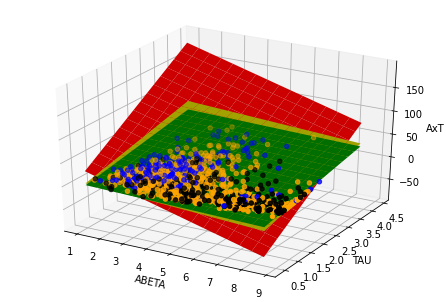

In [142]:
fig = plt.figure()
ax = Axes3D(fig)  # 3D image
ax.scatter(x, y, z, c=col_vec) # draw the scatter figure with different colors
ax.plot_surface(x1, x2, x3_seq1, color='y') # between Demansia and CN, blue points and black points
ax.plot_surface(x1, x2, x3_seq2, color='r')   # between CN and MCI, black points and orange points
ax.plot_surface(x1, x2, x3_seq3, color='g') # between Demansia and MCI, blue points and orange points
ax.set_zlabel('AxT')
ax.set_ylabel('TAU')
ax.set_xlabel('ABETA')
plt.show()

## Question 2

In [3]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import pandas as pd

### 2 a)

The completed gradient_descent function is as followed.

In [144]:
def gradient_descent(y, x, beta=[0,0], alpha = 1, epsilon=1e-10, maxiter=10000):
    #unless we start with a specific intialization
    #start with a random solution
    if beta[0] == 0 and beta[1] == 0:
        #use random intiaialization
        beta = np.random.rand(2)
    #our new solution
    beta_new = [0,0]
    #improvement compared to the previous round
    improve = epsilon + 1
    #counter for the iterations
    cnt=0
    #make predictions using the current model
    yhat = beta[0] + x * beta[1]
    #compute the difference between prediction and observation
    error = yhat - y
    #Value of the current cost function [here it is just the RSS]
    ### COMPLETE THIS LINE ###
    J_current = np.sum(error ** 2) / 2 * np.size(y)
    #run iterations un
    while (maxiter < 0 or cnt < maxiter) and (improve > epsilon):
        #update rule for the betas
        ### COMPLETE THE UPDATE RULE ###
        beta_new[0] = beta[0] - alpha * np.sum(yhat - y) / np.size(y)
        beta_new[1] = beta[1] - alpha * np.sum((yhat - y) * x) / np.size(y)
        #make sure we copy the new betas
        beta = np.copy(beta_new)
        #compute predictions with new beta values
        yhat = beta[0] + x * beta[1]
        #compute the error
        error = yhat - y
        #compute the cost function
        ### COMPLETE THIS LINE (SAME AS ABOVE for J_current) ###
        J_new = np.sum(error ** 2) / 2 * np.size(y)
        #compute the improvement compared to previous round
        improve = J_current - J_new
        #update cost of our current 'fit'
        J_current = J_new
        #increase counter
        cnt += 1
        #if our fit is worse than the one before: our alpha is too large
        #issue a warning and continue with a smaller value of alpha
        if improve < 0:
            #if we have negative improvement, our alpha is too large!
            #let's try with half the step size
            sys.stderr.write("observed negative improvement, lowering alpha!\n")
            improve = epsilon + 1
            alpha /= 2
    print(cnt)
    return (beta)

### 2 b)

In [4]:
#load the training and test data (assuming it is in the same folder)
training_data_2 = pd.read_csv("ADNI_CSF.csv")

In [5]:
# set the x and y data
x = training_data_2.ABETA
y = training_data_2.TAU

Now let's calculate the beta with different maxiters.

In [152]:
beta_50 = gradient_descent(y, x, beta=[-1,0.5], alpha = 1, epsilon=1e-10, maxiter=50)
beta_50

50


observed negative improvement, lowering alpha!
observed negative improvement, lowering alpha!
observed negative improvement, lowering alpha!
observed negative improvement, lowering alpha!


array([0.56263765, 0.15911461])

In [153]:
beta_100 = gradient_descent(y, x, beta=[-1,0.5], alpha = 1, epsilon=1e-10, maxiter=100)
beta_100

100


observed negative improvement, lowering alpha!
observed negative improvement, lowering alpha!
observed negative improvement, lowering alpha!
observed negative improvement, lowering alpha!


array([1.09092496, 0.06067441])

So the regression line after 0, 50, 100 steps of the algorithem is:\
\
$ y = -1 + 0.5 * x $\
\
$ y = 0.563 + 0.159 * x $\
\
$ y = 1.091 + 0.061 * x $

In [158]:
x_seq = np.arange(1,9,0.5)
y_seq1 = -1 + 0.5 * x_seq
y_seq2 = 0.563 + 0.159 * x_seq
y_seq3 = 1.091 + 0.061 * x_seq

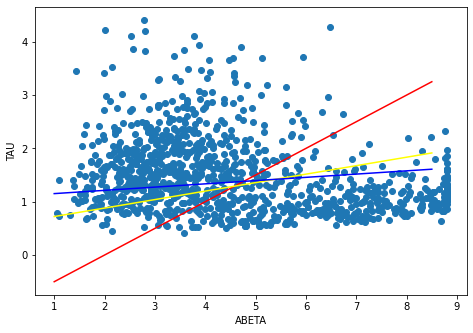

In [159]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x, y)
ax.plot(x_seq, y_seq1,c='red') # 0 steps
ax.plot(x_seq, y_seq2,c='yellow') # 50 steps
ax.plot(x_seq, y_seq3,c='blue') # 100 steps
ax.set_xlabel("ABETA")
ax.set_ylabel("TAU")
plt.show()

### 2 c)

In [10]:
def ridge_regression(y, x, beta=[0,0], alpha = 1, epsilon=1e-10, maxiter=10000, lambda1=0):
    #unless we start with a specific intialization
    #start with a random solution
    if beta[0] == 0 and beta[1] == 0:
        #use random intiaialization
        beta = np.random.rand(2)
    #our new solution
    beta_new = [0,0]
    #improvement compared to the previous round
    improve = epsilon + 1
    #counter for the iterations
    cnt=0
    #make predictions using the current model
    yhat = beta[0] + x * beta[1]
    #compute the difference between prediction and observation
    error = yhat - y
    #Value of the current cost function [here it is just the RSS]
    ### COMPLETE THIS LINE ###
    J_current = np.sum(error ** 2) + lambda1 * (beta[1] ** 2)
    #run iterations un
    while (maxiter < 0 or cnt < maxiter) and (improve > epsilon):
        #update rule for the betas
        ### COMPLETE THE UPDATE RULE ###
        beta_new[0] = beta[0] - alpha * np.sum(error)
        beta_new[1] = beta[1] - alpha * (np.sum((error) * x) + 2 * lambda1 * beta[1])
        #make sure we copy the new betas
        beta = np.copy(beta_new)
        #compute predictions with new beta values
        yhat = beta[0] + x * beta[1]
        #compute the error
        error = yhat - y
        #compute the cost function
        ### COMPLETE THIS LINE (SAME AS ABOVE for J_current) ###
        J_new = np.sum(error ** 2) + lambda1 * (beta[1] ** 2)
        #compute the improvement compared to previous round
        improve = J_current - J_new
        #update cost of our current 'fit'
        J_current = J_new
        #increase counter
        cnt += 1
        #if our fit is worse than the one before: our alpha is too large
        #issue a warning and continue with a smaller value of alpha
        if improve < 0:
            #if we have negative improvement, our alpha is too large!
            #let's try with half the step size
            sys.stderr.write("observed negative improvement, lowering alpha!\n")
            improve = epsilon + 1
            alpha /= 2
    print(cnt)
    return (beta)

Now let's compute the beta with different lambdas.

In [11]:
# lambda = 0
beta_0 = ridge_regression(y, x, beta=[-1,0.5], alpha = 0.01, epsilon=1e-10, maxiter=10000, lambda1=0)
beta_0

observed negative improvement, lowering alpha!
observed negative improvement, lowering alpha!
observed negative improvement, lowering alpha!
observed negative improvement, lowering alpha!
observed negative improvement, lowering alpha!
observed negative improvement, lowering alpha!
observed negative improvement, lowering alpha!
observed negative improvement, lowering alpha!


1521


array([ 1.91105014, -0.09214638])

In [12]:
# lambda = 1000
beta_1000 = ridge_regression(y, x, beta=[-1,0.5], alpha = 0.01, epsilon=1e-10, maxiter=10000, lambda1=1000)
beta_1000

observed negative improvement, lowering alpha!
observed negative improvement, lowering alpha!
observed negative improvement, lowering alpha!
observed negative improvement, lowering alpha!
observed negative improvement, lowering alpha!
observed negative improvement, lowering alpha!
observed negative improvement, lowering alpha!
observed negative improvement, lowering alpha!
observed negative improvement, lowering alpha!


4143


array([ 1.77652121, -0.06236327])

In [14]:
# lambda = 100000
beta_100000 = ridge_regression(y, x, beta=[-1,0.5], alpha = 0.001, epsilon=1e-10, maxiter=10000, lambda1=100000)
beta_100000

observed negative improvement, lowering alpha!
observed negative improvement, lowering alpha!
observed negative improvement, lowering alpha!
observed negative improvement, lowering alpha!
observed negative improvement, lowering alpha!
observed negative improvement, lowering alpha!
observed negative improvement, lowering alpha!
observed negative improvement, lowering alpha!


4304


array([ 1.50336817, -0.00188994])

So the regression line with 0, 1000, 100000 lambdas of the algorithem is:\
\
$ y = 1.911 - 0.092 * x $\
\
$ y = 1.777 - 0.062 * x $\
\
$ y = 1.503 - 0.002 * x $

In [15]:
x_seq = np.arange(1,9,0.5)
y_seq4 = 1.911 - 0.092 * x_seq
y_seq5 = 1.777 - 0.062 * x_seq
y_seq6 = 1.503 - 0.002 * x_seq

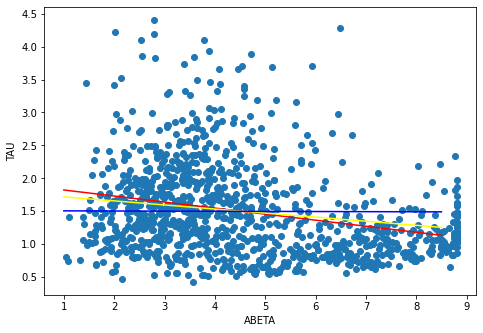

In [20]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x, y)
ax.plot(x_seq, y_seq4, c='red') # lambda = 0
ax.plot(x_seq, y_seq5,c='yellow') # lambda = 1000
ax.plot(x_seq, y_seq6,c='blue') # lambda = 100000
ax.set_xlabel("ABETA")
ax.set_ylabel("TAU")
plt.show()

## Question 3

We have N = 200 subjects and p = 1000 variables, what we want is to use these data to predicts the healthy aging depending on these variables, which is a regression problem. 

Because there are many variables varies in different kinds, so the first thing is to do the data preprocessing that is to normalize and scale of our features. Because the number of variables (features) is much larger than the number of subjects, it will easily bring two main problems that are prediction performance and interpretation, which could cause overfitting and complex models problems. To solve this two things, we need to setting some coefficients to 0, which means we will cut off some of our features. We can do this by using forward stepwise method which could keep the features that improves the fit the most.

After we have preprocessed our data and done the feature selection, it is time to select a regressor and make it learn. There are several models we could use, such as linear regression, ridge regression, LASSO, random forest, suppor vector machine, etc. What we need to do is to evaluate the performance of these regressors and choose the best one.

To do the evaluation, first we need to estimate the best parameters combination in each model, which means the best performance of each model. We can use AIC or BIC or cross validation to achieve our goal. Because the dataset is not so rich, it will be better to use K-fold cross validation.

Then we need to evaluate the performance of each model with their best parameters. Usually we use R2 score to present the performance of models. To get a R2 score with little data (no testing data), we could also use the K-fold cross validation, which means a nested cross validation. 

After get the R2 scores of every model, we can make a comparation of them. The one whose R2 score is closest to 0 is the best one. Thus we could get the model we want.

## Question 4

In [5]:
#import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

### 4 a)

In [2]:
#load the data
training_data = pd.read_csv("./ADNI_CW1_TRAIN.csv")
training_data.head()

,Unnamed: 0,BRAAK1_SUVR,BRAAK34_SUVR,BRAAK56_SUVR,BRAAK2_SUVR,AMYGDALA_VOLUME,LEFT_MIDDLEFR_VOLUME,LEFT_ORBITOFR_VOLUME,LEFT_PARSFR_VOLUME,LEFT_ACCUMBENS_AREA_VOLUME,...,CTX_RH_SUPERIORFRONTAL_VOLUME,CTX_RH_SUPERIORPARIETAL_VOLUME,CTX_RH_SUPERIORTEMPORAL_VOLUME,CTX_RH_SUPRAMARGINAL_VOLUME,CTX_RH_TEMPORALPOLE_VOLUME,CTX_RH_TRANSVERSETEMPORAL_VOLUME,rAGE,MMSE,MOCA,ADAS13
0,1,1.746905,1.483261,1.546382,1.271404,2931,17529,11857,9433,516,...,19884,11870,9089,8547,2854,765,89.360917,27,20,15.33
1,2,3.327639,1.620953,1.600515,1.335596,2196,15693,13534,8501,338,...,19539,10677,9634,7587,3038,725,79.327173,26,15,16.67
2,7,2.276650,1.513441,1.495997,1.528524,2010,14003,10816,7341,318,...,14378,8787,8208,7110,2466,783,86.946338,26,18,18.00
3,9,2.876378,1.616886,1.627909,1.329455,1776,17903,11414,8771,116,...,20874,12774,8955,7415,1561,652,83.140452,29,21,27.00
4,10,1.721484,1.477540,1.534489,1.192547,2414,19072,11973,7995,353,...,17719,10163,10132,7552,2311,708,85.723819,29,24,12.00


In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [44]:
X = training_data.loc[:,"AMYGDALA_VOLUME":"ADAS13"]

In [45]:
y = training_data.loc[:,"BRAAK34_SUVR"]

First let's calculate the cross-validation score in response to $\alpha$.

In [271]:
a = np.power(10, np.arange(0,3, 0.05))
np.size(a)

60

In [272]:
parameters = {'alpha': a}
my_elastic = ElasticNet(l1_ratio=0.5)
clf = GridSearchCV(my_elastic, parameters, cv=10)
clf.fit(X, y)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([  1.        ,   1.12201845,   1.25892541,   1.41253754,
         1.58489319,   1.77827941,   1.99526231,   2.23872114,
         2.51188643,   2.81838293,   3.16227766,   3.54813389,
         3.98107171,   4.46683592,   5.01187234,   5.62341325,
         6.30957344,   7.07945784,   7.94328235,   8.91250938,
        10.        ,  11.22018454,  12.58925412,  14.12537545,
        15.84893192,  17.7827941 ,  19.952...
        25.11886432,  28.18382931,  31.6227766 ,  35.48133892,
        39.81071706,  44.66835922,  50.11872336,  56.23413252,
        63.09573445,  70.79457844,  79.43282347,  89.12509381,
       100.        , 112.20184543, 125.89254118, 141.25375446,
       158.48931925, 177.827941  , 199.5262315 , 223.87211386,
       251.18864315, 281.83829313, 316.22776602, 354.81338923,
       398.10717055, 446.68359215, 501.18723363, 562.34132519,
       630.95734448, 707.94578438, 794.32823472, 891.2509

In [273]:
clf.best_estimator_ # this is the best alpha of this model

ElasticNet(alpha=35.48133892335755)

In [274]:
results = pd.DataFrame({"alpha" : a, "mean_test_score": clf.cv_results_["mean_test_score"]})

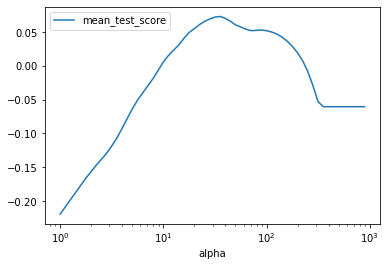

In [125]:
results.plot(x='alpha', y='mean_test_score', logx=True)

Then let's calculate the training score and testing score in response to $\alpha$.

In [126]:
#load the data
testing_data = pd.read_csv("./ADNI_CW1_TEST.csv")
testing_data.head()

,Unnamed: 0,BRAAK1_SUVR,BRAAK34_SUVR,BRAAK56_SUVR,BRAAK2_SUVR,AMYGDALA_VOLUME,LEFT_MIDDLEFR_VOLUME,LEFT_ORBITOFR_VOLUME,LEFT_PARSFR_VOLUME,LEFT_ACCUMBENS_AREA_VOLUME,...,CTX_RH_SUPERIORFRONTAL_VOLUME,CTX_RH_SUPERIORPARIETAL_VOLUME,CTX_RH_SUPERIORTEMPORAL_VOLUME,CTX_RH_SUPRAMARGINAL_VOLUME,CTX_RH_TEMPORALPOLE_VOLUME,CTX_RH_TRANSVERSETEMPORAL_VOLUME,rAGE,MMSE,MOCA,ADAS13
0,8,1.505047,1.420539,1.585301,1.079836,3522,19926,12166,8743,535,...,20350,12910,11641,9700,2379,788,68.091581,30,25,10.33
1,16,2.263944,1.548714,1.751164,1.293916,3245,15079,11106,8847,366,...,15532,12088,9325,10129,2314,928,80.709582,30,25,13.67
2,18,3.305072,2.386554,1.987440,1.922705,2592,16888,13738,9931,463,...,20410,13077,9624,9783,3426,836,71.842437,29,14,18.67
3,20,1.709805,1.395329,1.501391,1.243234,2048,16941,12550,9852,359,...,20819,10092,10563,9048,2311,931,82.305476,26,21,14.00
4,25,3.960278,1.692979,1.733802,1.536970,2482,19527,13158,10026,303,...,18358,11232,10519,9404,1765,1071,85.733128,28,24,21.33


In [127]:
X_test = testing_data.loc[:,"AMYGDALA_VOLUME":"ADAS13"]
y_test = testing_data.loc[:,"BRAAK34_SUVR"]

In [128]:
train_score = np.zeros((np.size(a)))
test_score = np.zeros((np.size(a)))

In [129]:
for i in range(np.size(a)):
    elastic = ElasticNet(alpha = a[i], l1_ratio=0.5)
    elastic.fit(X, y)
    train_score[i] = elastic.score(X, y)
    y_pred = elastic.predict(X_test)
    test_score[i] = r2_score(y_test, y_pred)

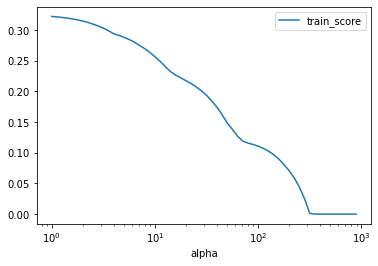

In [130]:
results_train = pd.DataFrame({"alpha" : a, "train_score": train_score})
results_train.plot(x='alpha', y='train_score', logx=True)

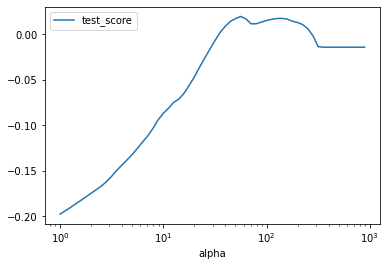

In [131]:
results_test = pd.DataFrame({"alpha" : a, "test_score": test_score})
results_test.plot(x='alpha', y='test_score', logx=True)

We can plot the three figures into one figure.

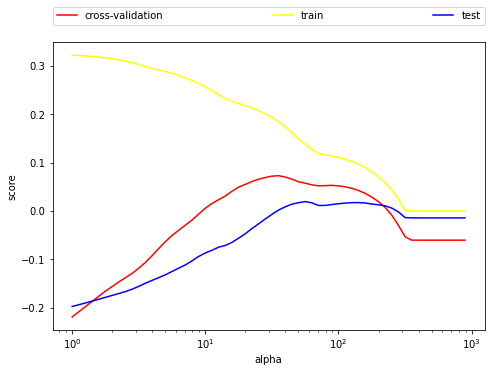

In [282]:
fig=plt.figure()
fig.add_axes([0,0,1,1])
plt.plot(a, clf.cv_results_["mean_test_score"], c='red', label='cross-validation') 
plt.plot(a, train_score,c='yellow', label='train') 
plt.plot(a, test_score,c='blue', label='test') 
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=0, ncol=3, mode="expand", borderaxespad=0.)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("score")
plt.show()

From the cross-validation results, we know that the best estimator is ElasticNet(alpha=35.48133892335755), so we can calculate the performance of this final fitted model on the test data.

In [132]:
clf.best_index_ # the best alpha's index in alphas

31

In [133]:
test_score[clf.best_index_] # the final performance

0.0018865198567384889

### 4 b)

In [141]:
from sklearn.svm import SVR

In [168]:
c = np.logspace(-10,-5,base=10,num=10)
c

array([1.00000000e-10, 3.59381366e-10, 1.29154967e-09, 4.64158883e-09,
       1.66810054e-08, 5.99484250e-08, 2.15443469e-07, 7.74263683e-07,
       2.78255940e-06, 1.00000000e-05])

In [169]:
parameters = {'kernel': ['linear', 'poly', 'rbf'], 'C': c}
svr = SVR(degree=3)
clf2 = GridSearchCV(svr, parameters, cv=10)
clf2.fit(X, y)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': array([1.00000000e-10, 3.59381366e-10, 1.29154967e-09, 4.64158883e-09,
       1.66810054e-08, 5.99484250e-08, 2.15443469e-07, 7.74263683e-07,
       2.78255940e-06, 1.00000000e-05]),
                         'kernel': ['linear', 'poly', 'rbf']})

In [170]:
clf2.cv_results_

{'mean_fit_time': array([4.90484238e-03, 4.90093231e-03, 5.60123920e-03, 4.70230579e-03,
        4.90217209e-03, 5.60014248e-03, 5.90548515e-03, 4.89578247e-03,
        5.77623844e-03, 7.69999027e-03, 5.49662113e-03, 5.90276718e-03,
        1.05035067e-02, 4.90231514e-03, 5.60121536e-03, 2.75042772e-02,
        5.10101318e-03, 5.69953918e-03, 1.01022506e-01, 5.00097275e-03,
        5.50086498e-03, 3.37075353e-01, 4.80039120e-03, 5.70075512e-03,
        1.61936402e+00, 5.29756546e-03, 6.00695610e-03, 6.32481952e+00,
        4.89885807e-03, 5.69617748e-03]),
 'std_fit_time': array([5.32041828e-04, 2.99930648e-04, 4.89989022e-04, 4.59242662e-04,
        3.00445759e-04, 4.89250842e-04, 3.01678391e-04, 3.04944021e-04,
        3.93838845e-04, 6.46610083e-04, 5.00776001e-04, 3.00609298e-04,
        8.05784288e-04, 3.00671461e-04, 4.90018218e-04, 3.80079050e-03,
        3.00232628e-04, 4.57323058e-04, 2.96128042e-02, 1.58148994e-07,
        4.99560003e-04, 8.88775636e-02, 3.99748520e-04, 4.592

In [217]:
clf2.best_params_ # This is best parmeter combination

{'C': 1.2915496650148826e-09, 'kernel': 'linear'}

In [186]:
results_b = pd.DataFrame({"index": np.arange(len(clf2.cv_results_['params'])), "params" : clf2.cv_results_["params"], "mean_test_score": clf2.cv_results_["mean_test_score"]})

In [189]:
results_b

,index,params,mean_test_score
0,0,"{'C': 1e-10, 'kernel': 'linear'}",0.033797
1,1,"{'C': 1e-10, 'kernel': 'poly'}",-0.049830
2,2,"{'C': 1e-10, 'kernel': 'rbf'}",-0.049830
3,3,"{'C': 3.593813663804626e-10, 'kernel': 'linear'}",0.060816
4,4,"{'C': 3.593813663804626e-10, 'kernel': 'poly'}",-0.049830
5,5,"{'C': 3.593813663804626e-10, 'kernel': 'rbf'}",-0.049830
6,6,"{'C': 1.2915496650148826e-09, 'kernel': 'linear'}",0.075305
7,7,"{'C': 1.2915496650148826e-09, 'kernel': 'poly'}",-0.049830
8,8,"{'C': 1.2915496650148826e-09, 'kernel': 'rbf'}",-0.049830
9,9,"{'C': 4.641588833612773e-09, 'kernel': 'linear'}",0.053077


First let's get the performance of cross-validation error depending on C and kernel choice. The index of C and kernel choice are listed as above.

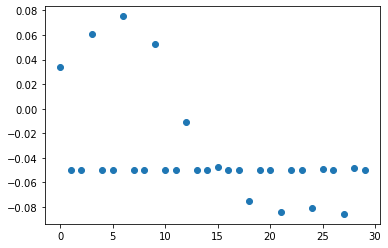

In [192]:
plt.scatter(results_b['index'], results_b['mean_test_score'])

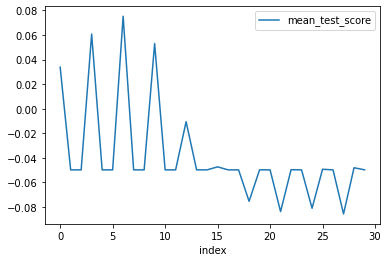

In [193]:
results_b.plot(x='index', y='mean_test_score')

In [203]:
train_score_b = []
test_score_b = []

Then let's get the performance of training and testing depending on C and kernel choice.The index of C and kernel choice are listed as above.

In [207]:
for i in range(np.size(c)):
    for j in ['linear', 'poly', 'rbf']:
        svr = SVR(kernel=j, C=c[i])
        svr.fit(X, y)
        train_score_b.append(svr.score(X, y))
        y_pred = svr.predict(X_test)
        test_score_b.append(r2_score(y_test, y_pred))

In [208]:
index = np.arange(len(clf2.cv_results_['params']))

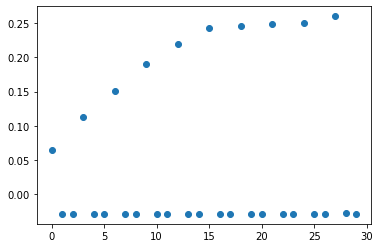

In [212]:
plt.scatter(index, train_score_b) # the performance on training

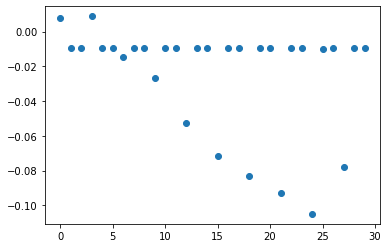

In [215]:
plt.scatter(index, test_score_b) # the performance on testing

We are actually not so satisfied about the results above because the running speed is so slow and the figure is not beautiful at all. So we can just not screen the kernels at first.

In [288]:
c1 = np.logspace(-5,1,base=10,num=50)

In [290]:
parameters = {'C': c1}
svr1 = SVR(kernel='poly', degree=3)
clf_1 = GridSearchCV(svr1, parameters, cv=10)
clf_1.fit(X, y)

GridSearchCV(cv=10, estimator=SVR(kernel='poly'),
             param_grid={'C': array([1.00000000e-05, 1.32571137e-05, 1.75751062e-05, 2.32995181e-05,
       3.08884360e-05, 4.09491506e-05, 5.42867544e-05, 7.19685673e-05,
       9.54095476e-05, 1.26485522e-04, 1.67683294e-04, 2.22299648e-04,
       2.94705170e-04, 3.90693994e-04, 5.17947468e-04, 6.86648845e-04,
       9.10298178e-04, 1.20679264e-03, 1.5998587...
       8.68511374e-03, 1.15139540e-02, 1.52641797e-02, 2.02358965e-02,
       2.68269580e-02, 3.55648031e-02, 4.71486636e-02, 6.25055193e-02,
       8.28642773e-02, 1.09854114e-01, 1.45634848e-01, 1.93069773e-01,
       2.55954792e-01, 3.39322177e-01, 4.49843267e-01, 5.96362332e-01,
       7.90604321e-01, 1.04811313e+00, 1.38949549e+00, 1.84206997e+00,
       2.44205309e+00, 3.23745754e+00, 4.29193426e+00, 5.68986603e+00,
       7.54312006e+00, 1.00000000e+01])})

In [291]:
clf_1.best_params_ # This is best parmeter 

{'C': 0.14563484775012445}

In [299]:
clf_1.best_score_ # This is best score of poly

0.07333684066595639

In [292]:
train_score_1 = []
test_score_1 = []

In [294]:
# record train and test score
for i in range(np.size(c1)):
    svr1 = SVR(kernel='poly',  degree=3, C=c1[i])
    svr1.fit(X, y)
    train_score_1.append(svr1.score(X, y))
    y_pred = svr1.predict(X_test)
    test_score_1.append(r2_score(y_test, y_pred))

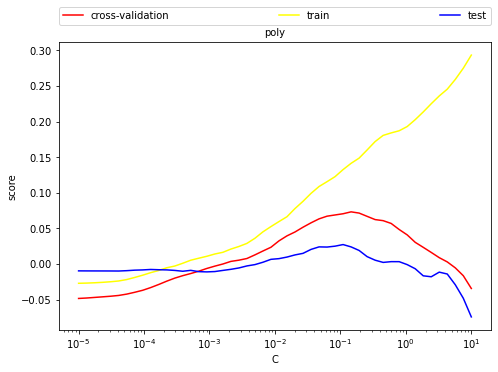

In [297]:
# plot figure of cross-validation scores, train scores, test scores depending on C
fig=plt.figure()
fig.add_axes([0,0,1,1])
plt.plot(c1, clf_1.cv_results_["mean_test_score"], c='red', label='cross-validation') 
plt.plot(c1, train_score_1,c='yellow', label='train') 
plt.plot(c1, test_score_1,c='blue', label='test') 
plt.title("poly",fontsize=10)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=0, ncol=3, mode="expand", borderaxespad=0.)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("score")
plt.show()

In [300]:
c2 = np.logspace(-5,1,base=10,num=50)

In [301]:
parameters = {'C': c2}
svr2 = SVR(kernel='rbf')
clf_2 = GridSearchCV(svr2, parameters, cv=10)
clf_2.fit(X, y)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': array([1.00000000e-05, 1.32571137e-05, 1.75751062e-05, 2.32995181e-05,
       3.08884360e-05, 4.09491506e-05, 5.42867544e-05, 7.19685673e-05,
       9.54095476e-05, 1.26485522e-04, 1.67683294e-04, 2.22299648e-04,
       2.94705170e-04, 3.90693994e-04, 5.17947468e-04, 6.86648845e-04,
       9.10298178e-04, 1.20679264e-03, 1.59985872e-03, 2.12095...
       8.68511374e-03, 1.15139540e-02, 1.52641797e-02, 2.02358965e-02,
       2.68269580e-02, 3.55648031e-02, 4.71486636e-02, 6.25055193e-02,
       8.28642773e-02, 1.09854114e-01, 1.45634848e-01, 1.93069773e-01,
       2.55954792e-01, 3.39322177e-01, 4.49843267e-01, 5.96362332e-01,
       7.90604321e-01, 1.04811313e+00, 1.38949549e+00, 1.84206997e+00,
       2.44205309e+00, 3.23745754e+00, 4.29193426e+00, 5.68986603e+00,
       7.54312006e+00, 1.00000000e+01])})

In [302]:
clf_2.best_params_ # This is best parmeter 

{'C': 1.389495494373136}

In [303]:
clf_2.best_score_ # This is best score of rbf

0.07645240227783553

In [304]:
train_score_2 = []
test_score_2 = []

In [305]:
for i in range(np.size(c2)):
    svr2 = SVR(kernel='rbf', C=c2[i])
    svr2.fit(X, y)
    train_score_2.append(svr2.score(X, y))
    y_pred = svr2.predict(X_test)
    test_score_2.append(r2_score(y_test, y_pred))

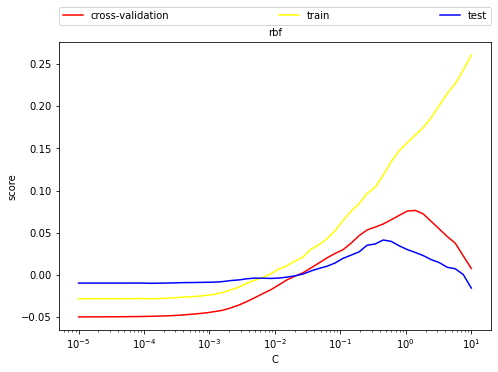

In [306]:
fig=plt.figure()
fig.add_axes([0,0,1,1])
plt.plot(c2, clf_2.cv_results_["mean_test_score"], c='red', label='cross-validation') 
plt.plot(c2, train_score_2,c='yellow', label='train') 
plt.plot(c2, test_score_2,c='blue', label='test') 
plt.title("rbf",fontsize=10)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=0, ncol=3, mode="expand", borderaxespad=0.)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("score")
plt.show()

In [307]:
c3 = np.logspace(-10,-5,base=10,num=50)

In [308]:
parameters = {'C': c3}
svr3 = SVR(kernel='linear')
clf_3 = GridSearchCV(svr3, parameters, cv=10)
clf_3.fit(X, y)

GridSearchCV(cv=10, estimator=SVR(kernel='linear'),
             param_grid={'C': array([1.00000000e-10, 1.26485522e-10, 1.59985872e-10, 2.02358965e-10,
       2.55954792e-10, 3.23745754e-10, 4.09491506e-10, 5.17947468e-10,
       6.55128557e-10, 8.28642773e-10, 1.04811313e-09, 1.32571137e-09,
       1.67683294e-09, 2.12095089e-09, 2.68269580e-09, 3.39322177e-09,
       4.29193426e-09, 5.42867544e-09, 6.86648...
       2.81176870e-08, 3.55648031e-08, 4.49843267e-08, 5.68986603e-08,
       7.19685673e-08, 9.10298178e-08, 1.15139540e-07, 1.45634848e-07,
       1.84206997e-07, 2.32995181e-07, 2.94705170e-07, 3.72759372e-07,
       4.71486636e-07, 5.96362332e-07, 7.54312006e-07, 9.54095476e-07,
       1.20679264e-06, 1.52641797e-06, 1.93069773e-06, 2.44205309e-06,
       3.08884360e-06, 3.90693994e-06, 4.94171336e-06, 6.25055193e-06,
       7.90604321e-06, 1.00000000e-05])})

In [309]:
clf_3.best_params_ # This is best parmeter 

{'C': 1.0481131341546874e-09}

In [310]:
clf_3.best_score_ # This is best score of linear

0.07743048080110851

In [311]:
train_score_3 = []
test_score_3 = []

In [312]:
for i in range(np.size(c3)):
    svr3 = SVR(kernel='linear', C=c3[i])
    svr3.fit(X, y)
    train_score_3.append(svr3.score(X, y))
    y_pred = svr3.predict(X_test)
    test_score_3.append(r2_score(y_test, y_pred))

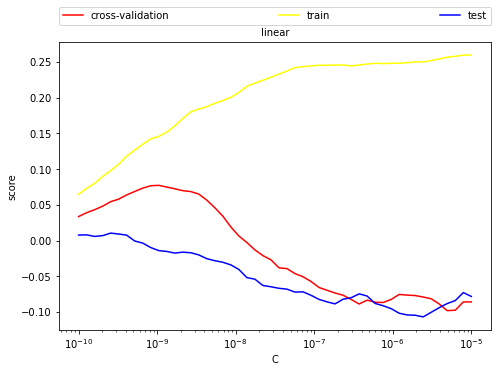

In [313]:
fig=plt.figure()
fig.add_axes([0,0,1,1])
plt.plot(c3, clf_3.cv_results_["mean_test_score"], c='red', label='cross-validation') 
plt.plot(c3, train_score_3,c='yellow', label='train') 
plt.plot(c3, test_score_3,c='blue', label='test') 
plt.title("linear",fontsize=10)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=0, ncol=3, mode="expand", borderaxespad=0.)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("score")
plt.show()

### 4 c)

In [146]:
from sklearn.ensemble import RandomForestRegressor

In [147]:
rfr = RandomForestRegressor(n_estimators=100,min_samples_split=5,oob_score=True)
rfr.fit(X, y)

RandomForestRegressor(min_samples_split=5, oob_score=True)

In [148]:
rfr.oob_score_  # the "out-of-bag" estimate

0.12153344132461164

In [149]:
rfr.score(X, y) # the performance (R2 score) of train data

0.8437430878722831

In [153]:
y_pred = rfr.predict(X_test)
r2_score(y_test,y_pred) # the performance (R2 score) of test data

0.19775535771639308

So the performance of training is 0.844, testing is 0.198, the "out-of-bag" estimate is 0.122.

### 4 d)

In [220]:
from sklearn.model_selection import cross_val_score

First let's look at the performance of ElasticNet.

In [218]:
# Non_nested parameter search and scoring
a = np.power(10, np.arange(0,3, 0.05))
parameters = {'alpha': a}
my_elastic = ElasticNet(l1_ratio=0.5)
clf1 = GridSearchCV(my_elastic, parameters, cv=5)

In [225]:
# Nested CV with parameter optimization
nested_score1 = cross_val_score(clf1, X, y, cv=10)

In [227]:
# calculate the mean and standard deviation of ElasticNet’ performance
nested_score1_mean = nested_score1.mean()
nested_score1_std = nested_score1.std()
nested_score1_mean, nested_score1_std

(0.06934539819907629, 0.12670841719676149)

Then let's look at the performance of SVR.

In [228]:
c = np.logspace(-10,-5,base=10,num=10)
parameters = {'kernel': ['linear', 'poly', 'rbf'], 'C': c}
my_svr = SVR(degree=3)
clf2 = GridSearchCV(my_svr, parameters, cv=5)

In [230]:
# Nested CV with parameter optimization
nested_score2 = cross_val_score(clf2, X, y, cv=10)

In [231]:
# calculate the mean and standard deviation of ElasticNet’ performance
nested_score2_mean = nested_score2.mean()
nested_score2_std = nested_score2.std()
nested_score2_mean, nested_score2_std

(0.07305328316995499, 0.07461116199062671)

Last let's look at the performance of RandomForestRegressor.

In [249]:
# Directly get the outer CV in RandomForestRegressor
my_rfr = RandomForestRegressor(n_estimators=100,min_samples_split=5,oob_score=True)
nested_score3 = cross_val_score(my_rfr, X, y, cv=10)

In [250]:
# calculate the mean and standard deviation of ElasticNet’ performance
nested_score3_mean = nested_score3.mean()
nested_score3_std = nested_score3.std()
nested_score3_mean, nested_score3_std

(-0.020357104692284668, 0.3430378372228702)

So the mean and standard deviation of the three models are shown below.The first row is the mean and the second row is the standard deviation of the model's performance.

In [252]:
results_d = pd.DataFrame({"ElasticNet": [nested_score1_mean, nested_score1_std], "SVR" : [nested_score2_mean, nested_score2_std], "RandomForestRegressor": [nested_score3_mean, nested_score3_std]})
results_d

,ElasticNet,SVR,RandomForestRegressor
0,0.069345,0.073053,-0.020357
1,0.126708,0.074611,0.343038


### 4 e)

The mean of the model's performance can partly decide whether the model is proper. From the results in 4 d), we will choose the RandomForestRegressor as our model.

In [253]:
y1 = training_data.loc[:,"BRAAK1_SUVR"]
y2 = training_data.loc[:,"BRAAK2_SUVR"]
y3 = training_data.loc[:,"BRAAK34_SUVR"]
y4 = training_data.loc[:,"BRAAK56_SUVR"]

In [254]:
y_test1 = testing_data.loc[:,"BRAAK1_SUVR"]
y_test2 = testing_data.loc[:,"BRAAK2_SUVR"]
y_test3 = testing_data.loc[:,"BRAAK34_SUVR"]
y_test4 = testing_data.loc[:,"BRAAK56_SUVR"]

In [255]:
rfr1 = RandomForestRegressor(n_estimators=100,min_samples_split=5,oob_score=True)
rfr1.fit(X, y1)

RandomForestRegressor(min_samples_split=5, oob_score=True)

In [256]:
rfr1.score(X, y1) # the performance (R2 score) of train data on BRAAK1_SUVR

0.8748946519151863

In [257]:
y_pred1 = rfr1.predict(X_test)
r2_score(y_test1,y_pred1) # the performance (R2 score) of test data on BRAAK1_SUVR

0.41184590407434174

In [258]:
rfr2 = RandomForestRegressor(n_estimators=100,min_samples_split=5,oob_score=True)
rfr2.fit(X, y2)

RandomForestRegressor(min_samples_split=5, oob_score=True)

In [259]:
rfr2.score(X, y2) # the performance (R2 score) of train data on BRAAK2_SUVR

0.8550178803103157

In [260]:
y_pred2 = rfr2.predict(X_test)
r2_score(y_test2,y_pred2) # the performance (R2 score) of test data on BRAAK2_SUVR

0.18515197479212386

In [261]:
rfr3 = RandomForestRegressor(n_estimators=100,min_samples_split=5,oob_score=True)
rfr3.fit(X, y3)

RandomForestRegressor(min_samples_split=5, oob_score=True)

In [262]:
rfr3.score(X, y3) # the performance (R2 score) of train data on BRAAK34_SUVR

0.827532692024607

In [263]:
y_pred3 = rfr3.predict(X_test)
r2_score(y_test3,y_pred3) # the performance (R2 score) of test data on BRAAK34_SUVR

0.2963893213997938

In [264]:
rfr4 = RandomForestRegressor(n_estimators=100,min_samples_split=5,oob_score=True)
rfr4.fit(X, y4)

RandomForestRegressor(min_samples_split=5, oob_score=True)

In [265]:
rfr4.score(X, y4) # the performance (R2 score) of train data on BRAAK56_SUVR

0.8413600652562385

In [266]:
y_pred4 = rfr4.predict(X_test)
r2_score(y_test4,y_pred4) # the performance (R2 score) of test data on BRAAK56_SUVR

0.09829206061390539

Let's summarize the results into one single dataframe. The first row is the performance of train data, the second row is the performance of test data.

In [268]:
results_e = pd.DataFrame({"BRAAK1_SUVR": [rfr1.score(X, y1), r2_score(y_test1,y_pred1)], "BRAAK2_SUVR" : [rfr2.score(X, y2), r2_score(y_test2,y_pred2)], "BRAAK34_SUVR": [rfr3.score(X, y3), r2_score(y_test3,y_pred3)], "BRAAK56_SUVR": [rfr4.score(X, y4), r2_score(y_test4,y_pred4)]})
results_e

,BRAAK1_SUVR,BRAAK2_SUVR,BRAAK34_SUVR,BRAAK56_SUVR
0,0.874895,0.855018,0.827533,0.841360
1,0.411846,0.185152,0.296389,0.098292


From the second row of dataframe above, we can see that the R2 score of BRAAK56_SUVR is the most closest one to 0, which means the BRAAK56_SUVR can be predicted best.